# Chapitre 4 - La préparation des données et les premières statistiques (1ère partie)



## 4.1 Les données utilisées
Pour une description complète de toutes les données, veuillez vous référer au sous-chapitre 4.1 de l'ouvrage.

Dans le cadre de ce Notebook, pour chaque jeu de données trop volumineux, nous conservons une version avec un extrait des données dans ce répertoire et un lien vers un autre site avec les données complètes (le code pour récupérer ces fichiers volumineux est présent sous forme de commentaire.


## 4.2 Les outils pour importer les données
On commence par importer les deux principaux packages que nous utiliserons :

In [1]:
import numpy as np
import pandas as pd

### 4.2.1 Importer des données structurées

La majorité des méthodes et traitements du data scientist prévoient l’utilisation de données sous deux formes :

- Données observations/variables : une ligne correspond à une observation et une colonne à une variable, qui peut être soit quantitative (numérique) soit qualitative (non numérique).
- Matrices de distance : il peut s’agir de corrélations, de distances euclidiennes, de tableaux de comptage (matrice de confusion)…

Ces deux structures de données sont souvent assez éloignées des données brutes obtenues en amont d’une analyse. Il va donc falloir réfléchir à la transformation des données.

### 4.2.2 Le traitement des données externes

L’une des forces de Pandas est l’importation et l’exportation des données. 

Ce package possède un ensemble de fonctions très large pour charger des données en mémoire et les exporter dans divers formats. Nous allons développer de nombreux exemples.

#### Importer un fichier csv

La fonction *read_csv()* de Pandas est une fonction avec un nombre de paramètres impressionnant, nous ne nous concentrons ici que sur quelques-uns qui sont importants.

Dans le cas d’un fichier csv classique, un seul paramètre est nécessaire. Il s’agit du chemin vers le fichier. Votre fichier peut se trouver directement sur votre machine mais aussi en ligne. Dans ce cas, il vous suffit de rentrer une adresse web. 

D’autres paramètres pourront vous être utiles lors du traitement de csv :

- *delimiter* : afin de donner le format des séparateurs entre valeurs dans le fichier. Utile dans le cas d’un csv avec des séparateurs points-virgules,
- *decimal* : afin de spécifier le séparateur décimal. Utile dans le cas d’un csv avec des séparateurs décimaux utilisant une virgule,
- *index_col* : afin de spécifier la position de la colonne servant d’index dans le DataFrame créé (attention les colonnes sont toujours indexées à 0),
- *header* : afin de dire si le titre de la colonne se trouve dans la première ligne. Si ce n’est pas le cas, on peut utiliser le paramètre names afin de fournir une liste avec le nom des colonnes pour le DataFrame,
- *dtypes* : dans le cas de gros jeux de données, il peut être intéressant de fournir une liste de types de colonnes ou un dictionnaire afin d’éviter à Python d’avoir à les deviner (ce qui vous évitera certains warnings),
- de nombreux autres paramètres, notamment sur le traitement des données manquantes, sur la transformation des dates, sur le codage des chaînes de caractères…

On utilise *pd.read_csv()* pour lire un fichier csv

Dans ce cas, on va récupérer les données des logements AirBnB de Paris.

In [2]:
# Import d'un extrait
listing=pd.read_csv("../data/listing_extrait.csv", index_col=0)

# Import du fichier complet
#listing=pd.read_csv("https://www.stat4decision.com/listings.csv.gz", index_col=0)

#### Importer un fichier csv très volumineux

On commence par importer quelques lignes

Pour appliquer ce code, il vous faut une machine suffisamment puissante et l'accès au fichier :
https://www.data.gouv.fr/fr/datasets/base-sirene-des-entreprises-et-de-leurs-etablissements-siren-siret/

On charge par morceaux :

On peut aussi utiliser Dask :

si on utilise nos données AirBnB :

Une fois que vous avez travaillé sur une base volumineuse, vous arrivez souvent à des sorties aussi volumineuses. Il faudra alors stocker ces résultats sur de la mémoirephysique. 

Pour cela, deux formats sont à privilégier aujourd’hui :
    
- Le format HDF5, privilégié par les utilisateurs de Pandas (.to_hdf()).
- Le format parquet, qui est un format de stockage en colonnes très simple à utiliser et qui s’adapte très bien à des environnements tels que Apache Spark ou au cas du package Dask (.to_parquet()).

#### Importer un fichier Excel

Microsoft Excel reste l’un des outils de base pour traiter de la donnée. Dans la plupart des projets de data science, vous serez amené à croiser un fichier Excel, que ce soit pour stocker des données ou pour stocker des références ou des informations
annexes.

Pandas possède des outils pour importer des données en Excel sans avoir à passer
par une transformation en csv (souvent fastidieuse si vous avez des classeurs avec de
nombreuses feuilles).

##### L’approche pd.read_excel() :

Cette approche ressemble à l’importation en csv. Pour récupérer le fichier Excel, il faut connaître le nom ou la position de la feuille qui nous intéresse :

In [3]:
frame_credit = pd.read_excel("../data/credit.xlsx", sheet_name=0, engine='openpyxl')

In [4]:
# on peut ajouter le nom de la feuille
frame_credit=pd.read_excel("../data/credit.xlsx", sheet_name="donnees", engine='openpyxl')

In [5]:
# on peut utiliser uniquement certaines colonnes
frame_credit_af=pd.read_excel("../data/credit.xlsx", sheet_name="donnees", usecols="A:E", engine='openpyxl')

##### L''approche ExceFile()
Il s’agit d’utiliser une classe de Pandas permettant de créer un objet du type ExcelFile. Cet objet a de nombreuses méthodes et offre la possibilité d’extraire des feuilles de manière plus rapide et automatique, ainsi on pourra avoir :

In [6]:
objet_excel=pd.ExcelFile("../data/credit.xlsx", engine='openpyxl')

dico_frame={}
for feuille in objet_excel.sheet_names :
    if feuille.find("_data")>0 :
        dico_frame[feuille]=objet_excel.parse(feuille)

In [7]:
frame = pd.read_excel("../data/credit.xlsx", sheet_name=0, usecols="C",
                      skiprows = 5, nrows = 10, header = None, engine='openpyxl')

#### Importer une table issue d’une base de données SQL

Le langage SQL est un langage central de la science des données. La majorité des
bases de données relationnelles peuvent être requêtées en utilisant le langage SQL.
C’est d’ailleurs aujourd’hui l’un des trois langages les plus utilisés par le data scientist
(après Python et R). SQL va vous permettre d’extraire des tables de données qui
pourront ensuite être chargées en mémoire dans des DataFrames.

Pour passer de la base SQL à Python, il faut donc un connecteur permettant de
se connecter à la base et de faire des requêtes directement dessus. Un package
central de Python est très utile dans ce but : c’est SQLalchemy qui a aujourd’hui
remplacé les nombreux packages spécifiques qui pouvaient exister afin de requêter
des bases de données SQL en fonction du type de base : MySQL, PostgreSQL,
SQLlite… SQLalchemy a l’avantage de fournir une seule approche.

On va utliser :

In [8]:
from sqlalchemy import create_engine, inspect

In [9]:
ma_con = create_engine("sqlite:///../data/salaries.sqlite")

In [10]:
# on peut vérifier le nom des tables
inspection = inspect(ma_con)
inspection.get_table_names()

['Salaries']

In [11]:
# on peut charger les données
frame_sql = pd.read_sql_query("SELECT * FROM Salaries", ma_con)

In [12]:
frame_sql.head()

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0,400184.25,,567595.43,567595.43,2011,,San Francisco,
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,,538909.28,538909.28,2011,,San Francisco,
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.6,,335279.91,335279.91,2011,,San Francisco,
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916,56120.71,198306.9,,332343.61,332343.61,2011,,San Francisco,
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.6,9737,182234.59,,326373.19,326373.19,2011,,San Francisco,


Si vous voulez lancer des requêtes SQL depuis Python sans forcément charger les
données dans un DataFrame, on pourra le faire avec :

#### Importer des données depuis le web

Le web est un domaine riche en sources de données, vous avez forcément entendu parler de web scrapping pour récupérer des données sur le web.

Le data scientist peut avoir besoin de récupérer des données sur Internet sans vouloir faire du développement web. Dans cette partie, deux approches seront examinées.

Quelle que soit l’approche, Beautiful-Soup est un package central.

Il va vous permettre de récupérer n’importe quel contenu HTML d’une page web et d’extraire de l’information de ce site web.

Si par exemple, on désire scrapper un site, on va devoir commencer par inspecter le code html lié à ce site. Si on désire récupérer tous les noms de package d’un article sur les packages Python pour la data science, on va devoir identifier la balise liée à ces noms et ensuite on pourra commencer à travailler en Python.

En inspectant le code html, on trouve ce code :

Il semble que la balise de division div de ce que l’on cherche se nomme *x-accordion-
heading*. 

On va donc utiliser Python pour récupérer le contenu de la page :

In [13]:
from requests import get
url = 'https://www.stat4decision.com/fr/packages-python-data-science/'
reponse = get(url)
print(reponse.text[:50])

<!DOCTYPE html>
<html class="no-js" lang="fr-FR">



L'objet reponse que l’on a créé est un objet requests.models.Response.
On va ensuite extraire de cette page les balises div du type recherché :

In [14]:
# on importe BeautifulSoup
from bs4 import BeautifulSoup
# on crée un objet en utlisant le parser Python
html_soup = BeautifulSoup(reponse.text, 'html.parser')
# on recherche la div qui nous intéresse
noms_packages = html_soup.find_all('div', class_='x-accordion-heading')

Dans noms_packages, on a tout ce qui se trouve dans le titre de chaque division.

Nous allons maintenant extraire de cet élément les noms des packages qui se trouvent au début de chaque titre :

In [15]:
# on fait une boucle sur les éléments de l’objet créé
for div_nom in noms_packages :
    # on affiche avec une majuscule en première lettre les
    # premiers mots avant une virgule
    print(div_nom.text.split(",")[0].capitalize())

Jupyter notebook
Numpy
Scipy
Pandas
Statsmodels
Scikit-learn
Matplotlib
Bokeh
Seaborn
Keras


Nous avons donc récupéré automatiquement les valeurs textuelles qui nous intéressent.

Il ne s’agit pas ici de développer plus de notions liées au langage html mais si vous désirez aller plus loin de ce côté-là il vous faudra quelques bases.

Si votre objectif est de directement charger des tableaux dans des objets DataFrame, les choses se simplifient. Pandas, combiné à Beautiful-Soup, fait une grande partie du travail pour vous.

Imaginons que l’on désire récupérer des données sportives, par exemple de tennis, nous allons utiliser les données de Wikipédia sur le tennis et essayer de stocker les informations sur les tournois du grand chelem

In [16]:
ma_page = pd.read_html("https://fr.wikipedia.org/wiki/Liste_des_champions_de_tennis_vainqueurs_en_Grand_Chelem_en_simple")
# le tableau des records masculins est en 25ème position dans la page
tableaux_records = ma_page[24]
tableaux_records.head()

Joueur Titres            Premier   Dernier  \
           Joueur  Total ère Open   Premier   Dernier   
0  Novak Djokovic     24       24   2008 OA  2023 USO   
1    Rafael Nadal     22       22   2005 RG   2022 RG   
2   Roger Federer     20       20  2003 WIM   2018 OA   
3    Pete Sampras     14       14  1990 USO  2002 USO   
4     Roy Emerson     12        0   1961 OA   1967 RG   

  Répartition par Grand Chelem                  
                          O.A. R-G. WIM U.S.O.  
0                           10    3   7      4  
1                            2   14   2      4  
2                            6    1   8      5  
3                            2    0   7      5  
4                            6    2   2      2

#### Importer des données venant de R

En data science, il arrive qu’on soit amené à travailler avec R en plus de Python.

Dans ce cas, on peut bien sûr extraire un fichier en csv depuis R puis le charger en Python comme indiqué plus haut. Il arrive que l’on stocke en R les données en utilisant le format *.Rdata* ou d’autres formats de R.

On va devoir d’abord vérifier qu’on a bien installé le package pyreadr. Pour cela, dans votre terminal, entrez la commande :

Remarque : Il peut arriver qu'on doive installer en plus le package tzlocal

Une fois ce package installé :

In [17]:
import pyreadr

result = pyreadr.read_r('../data/data_idf.RData')

In [18]:
# on vérifie quels tableaux sont stockés dans le fichier
result.keys()

odict_keys(['data'])

In [19]:
frame_r = result['data']
frame_r.head()

,CODGEO,LIBGEO,REG,DEP,P14_POP,P09_POP,SUPERF,NAIS0914,DECE0914,P14_MEN,...,ETAZ15,ETBE15,ETFZ15,ETGU15,ETGZ15,ETOQ15,ETTEF115,ETTEFP1015,Geo.Shape,geo_point_2d
0,95555,Saint-Gratien,11,95,20996.0,20258.0,2.42,1564.0,749.0,8909.81781473,...,3.0,38.0,142.0,1078.0,225.0,214.0,335.0,67.0,"{""type"": ""Polygon"", ""coordinates"": [[[2.274621...","48.9695044801, 2.28470111182"
1,95488,Pierrelaye,11,95,8155.0,7920.0,9.21,639.0,243.0,2891.0,...,8.0,47.0,135.0,623.0,241.0,65.0,228.0,72.0,"{""type"": ""Polygon"", ""coordinates"": [[[2.193617...","49.0190794714, 2.1606870483"
2,95543,Saint-Cyr-en-Arthies,11,95,242.0,229.0,3.89,9.0,4.0,93.1548117155,...,2.0,0.0,2.0,5.0,2.0,4.0,4.0,0.0,"{""type"": ""Polygon"", ""coordinates"": [[[1.732068...","49.058878265, 1.74176317637"
3,95523,La Roche-Guyon,11,95,446.0,447.0,4.61,18.0,21.0,186.507592836,...,0.0,6.0,6.0,48.0,17.0,14.0,13.0,4.0,"{""type"": ""Polygon"", ""coordinates"": [[[1.623323...","49.0883415268, 1.63442788467"
4,95678,Villiers-Adam,11,95,838.0,828.0,9.82,45.0,29.0,340.83198146,...,6.0,3.0,8.0,53.0,12.0,5.0,14.0,2.0,"{""type"": ""Polygon"", ""coordinates"": [[[2.236020...","49.0697597649, 2.23847351378"


### 4.2.3 Charger et transformer des données non structurées

L'une des forces de Python pour le traitement des données est sa capacité à transformer
des données non structurées ou semi-structurées en données structurées. Par
le traitement de quelques exemples, nous allons étudier la manière dont vous pouvez
travailler sur des données que vous n’aviez pas l’habitude de traiter avec d’autres outils.

Nous utiliserons quatre exemples :

- des images,
- des données sonores,
- des données textuelles stockées sous forme de JSON,
- des données xml.


#### Travailler sur des images

On peut charger directement des images dans différents formats

In [20]:
import matplotlib.pyplot as plt

In [21]:
arr_image=plt.imread("../other/python-pour-le-data-scientist-dunod.jpeg")

L'image est chargée dans un array à 3 dimensions et codé en RGB

In [22]:
arr_image.shape

(508, 360, 3)

Si on veut afficher l'image à partir de l'array, on peut utiliser :

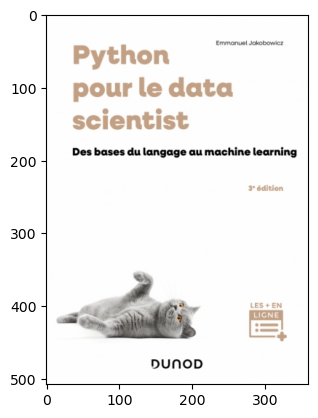

In [23]:
plt.imshow(arr_image)

On peut aussi construire des images directement à partir d'arrays. Ainsi on construit une image avec des couleurs générées aléatoirement :

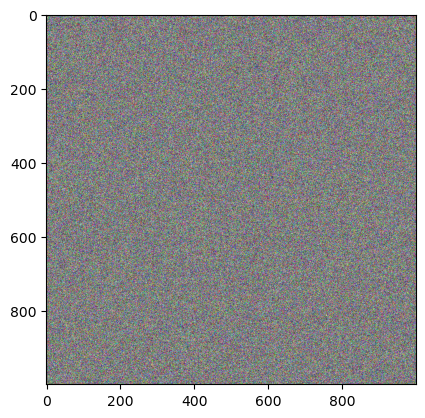

In [24]:
array_image_rand=np.random.randint(0,255,(1000,1000,3)).astype("uint8")
plt.imshow(array_image_rand)
# on sauvegarde cette figure
plt.savefig("../data/mon_image.jpg")

On génère des entiers entre 0 et 255 et on construit une image de 1000 x 1000 pixels. On va passer cela en type uint8 pour pouvoir l’afficher avec la fonction *imshow* de Matplotlib.

On peut aussi charger toutes les images d'un répertoire :

Nom du fichier : ../other\python-pour-le-data-scientist-dunod.jpeg


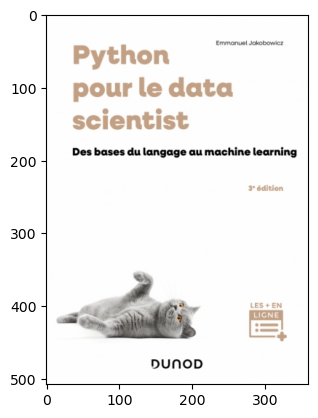

In [25]:
from skimage.io import imread_collection
# votre chemin
image_dir = '../other/*.jpeg'
# on crée une structure rassemblant toutes les images du répertoire
im_dir = imread_collection(image_dir)
print("Nom du fichier :", im_dir.files[0])
# affichage de l’image
plt.imshow(im_dir[0])

#### Travailler sur des sons

Si vous avez un fichier .wav et que vous désirez le transformer en données, vous pouvez utiliser les outils disponibles dans SciPy. Il peut vous arriver d’avoir un fichier en mp3 et de vouloir le transformer en une structure de données.

Dans un premier temps, l’environnement Jupyter vous permet d’écouter des fichiers de sons directement dans votre notebook. On pourra le faire avec ce code :

In [26]:
import IPython.display as ipd
ipd.Audio('../data/2022.wav')

Pour charger des données sonores, on utilisera un package spécifique nommé
Librosa qui va nous aider à récupérer des données sonores :

In [27]:
import librosa

In [28]:
%matplotlib inline
import matplotlib.pyplot as plt
import librosa.display

In [29]:
# Ce code permet d’extraire des données d’un extrait sonore.
data, sampling_rate = librosa.load('../data/2022.wav')
print(sampling_rate)

22050


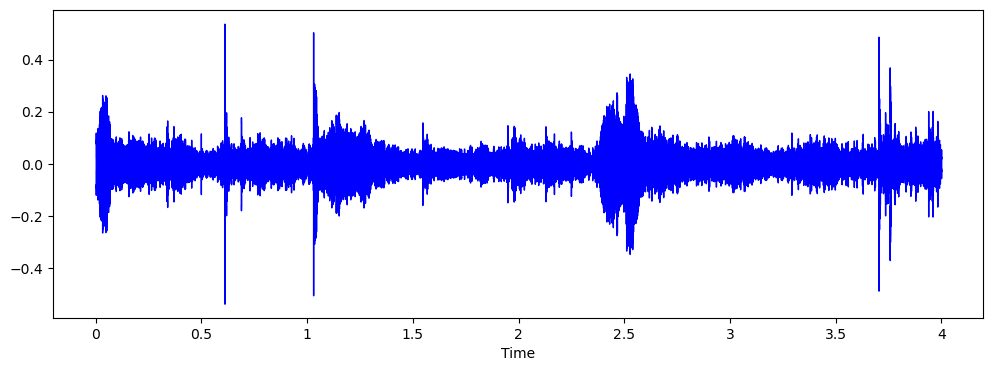

In [30]:
plt.figure(figsize=(12, 4))
librosa.display.waveshow(data, sr= sampling_rate,color="blue")

On pourra stocker des sons dans des objets et ensuite les utiliser dans des processus d’apprentissage. De plus, le package Librosa propose de nombreuses transformations afin d’obtenir des données lissées et utilisables.

#### Travailler sur des fichiers JSON

Un fichier JSON est un fichier très classique de stockage de données semi-structurées.

Vous croiserez fréquemment des jeux de données stockés en JSON mais aussi des pages web utilisant comme format de stockage le JSON (il s’agit du format de stockage des données d’un Jupyter notebook). L’importation d’un JSON est extrêmement
simple avec Pandas, on va utiliser *pd.read_json()* :

In [31]:
issues_pandas = pd.read_json('https://api.github.com/repos/pydata/pandas/issues?per_page=10')
issues_pandas[['state', 'title', 'updated_at']].head()

,state,title,updated_at
0,open,BUG: failed to roundtrip to pyarrow Table with...,2024-04-10 01:37:24+00:00
1,open,Backport PR #58203 on branch 2.2.x (DOC: Add r...,2024-04-10 00:16:07+00:00
2,open,BUG: Roundtripping bytes through pandas datafr...,2024-04-10 02:08:35+00:00
3,open,GH: PDEP vote issue template,2024-04-09 23:15:14+00:00
4,open,DOC/TST: Document numpy 2.0 support and add te...,2024-04-10 07:40:31+00:00


#### Travailler sur des fichiers semi-structurés xml

Pour les fichiers xml, nous utiliserons un package nommé xml qui va nous permettre de décrypter le fichier xml. Pandas ne possède pas directement d’outils pour transformer du xml en DataFrame car l’aspect semi-structuré du xml nous force à effectuer
quelques étapes avant de remplir un DataFrame.

Nous allons commencer par récupérer un fichier xml, comme par exemple ce catalogue de CD au format XML :

In [32]:
import requests
user_agent_url = 'https://www.w3schools.com/xml/cd_catalog.xml'
xml_data = requests.get(user_agent_url).content

Le code suivant est un peu plus complexe. On y crée une classe permettant de
passer d’un fichier XML à un DataFrame :

In [33]:
import xml.etree.ElementTree as ET

class XML2DataFrame :
    def __init__(self, xml_data):
        """Constructeur de la classe"""
        self.root = ET.XML(xml_data)
    
    def parse_root(self, root) :
        """Renvoie une liste de dictionnaires utilisant les enfants dans le
        XML."""
        return [self.parse_element(child) for child in iter(root)]

    def parse_element(self, element, parsed = None) :
        if parsed is None :
            parsed = dict()
        for key in element.keys() :
            parsed[key] = element.attrib.get(key)
        if element.text:
            parsed[element.tag] = element.text
        for child in list(element) :
            self.parse_element(child, parsed)
        return parsed

    def process_data(self) :
        structure_data = self.parse_root(self.root)
        return pd.DataFrame(structure_data)

In [34]:
objet_xml2df = XML2DataFrame(xml_data)
xml_dataframe = objet_xml2df.process_data()
xml_dataframe.head()

,CD,TITLE,ARTIST,COUNTRY,COMPANY,PRICE,YEAR
0,\n,Empire Burlesque,Bob Dylan,USA,Columbia,10.90,1985
1,\n,Hide your heart,Bonnie Tyler,UK,CBS Records,9.90,1988
2,\n,Greatest Hits,Dolly Parton,USA,RCA,9.90,1982
3,\n,Still got the blues,Gary Moore,UK,Virgin records,10.20,1990
4,\n,Eros,Eros Ramazzotti,EU,BMG,9.90,1997
